In [1]:
import pandas as pd
import numpy as np

from itertools import product

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor

%matplotlib inline

In [2]:
train_df = pd.read_csv('generated/train.csv')
test_df = pd.read_csv('generated/test.csv')

# Processing

In [3]:
#слишком крупные отрицательные значения
train_df.loc[train_df['item_cnt_month'] < -1] = -1

# Splitting and checking

In [4]:
def rmse(y_true, y_pred):
    y_true[np.where(y_true < 0)] = 0
    y_true[np.where(y_true > 20)] = 20
    
    y_pred[np.where(y_pred < 0)] = 0
    y_pred[np.where(y_pred > 20)] = 20
    
    return np.sqrt(np.mean((y_pred - y_true)**2))

In [5]:
train_x = train_df[train_df['date_block_num'] < 33].drop(['item_cnt_month'], axis = 1)
train_y = train_df[train_df['date_block_num'] < 33]['item_cnt_month']
train_cv = train_df[train_df['date_block_num'] > 32].drop(['item_cnt_month'], axis = 1)
train_cv_y = train_df[train_df['date_block_num'] > 32]['item_cnt_month']

In [6]:
lightGBM = LGBMRegressor()
lightGBM.fit(train_x, train_y)
lgb_prediction = lightGBM.predict(train_cv)
score_lightGBM = rmse(train_cv_y.values, lgb_prediction)
score_lightGBM

0.9012169916028019

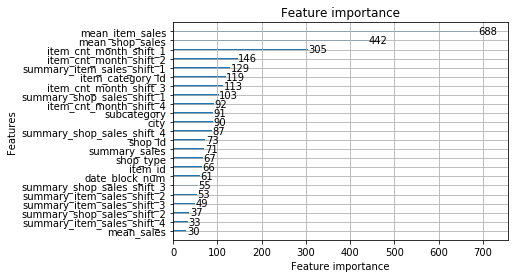

In [13]:
plot_importance(lightGBM)

In [7]:
catBoost = CatBoostRegressor()
catBoost.fit(train_x, train_y)
cat_prediction = catBoost.predict(train_cv)
score_catBoost = rmse(train_cv_y.values, cat_prediction)
score_catBoost

0:	learn: 3.9099472	total: 754ms	remaining: 12m 32s
1:	learn: 3.8704934	total: 1.51s	remaining: 12m 33s
2:	learn: 3.8337015	total: 2.28s	remaining: 12m 38s
3:	learn: 3.7996831	total: 3.08s	remaining: 12m 47s
4:	learn: 3.7625795	total: 3.89s	remaining: 12m 53s
5:	learn: 3.7306019	total: 4.71s	remaining: 13m
6:	learn: 3.6993489	total: 5.57s	remaining: 13m 9s
7:	learn: 3.6676822	total: 6.54s	remaining: 13m 31s
8:	learn: 3.6375511	total: 7.43s	remaining: 13m 38s
9:	learn: 3.6026803	total: 8.31s	remaining: 13m 42s
10:	learn: 3.5727175	total: 9.23s	remaining: 13m 49s
11:	learn: 3.5436309	total: 10.2s	remaining: 13m 59s
12:	learn: 3.5187497	total: 11.1s	remaining: 14m 1s
13:	learn: 3.4931159	total: 11.9s	remaining: 14m 1s
14:	learn: 3.4691286	total: 12.8s	remaining: 14m 1s
15:	learn: 3.4449671	total: 13.7s	remaining: 14m 1s
16:	learn: 3.4226026	total: 14.6s	remaining: 14m 2s
17:	learn: 3.4014914	total: 15.4s	remaining: 14m 2s
18:	learn: 3.3813589	total: 16.3s	remaining: 14m 3s
19:	learn: 3.35

155:	learn: 2.5818921	total: 3m 17s	remaining: 17m 49s
156:	learn: 2.5808378	total: 3m 18s	remaining: 17m 45s
157:	learn: 2.5773789	total: 3m 19s	remaining: 17m 42s
158:	learn: 2.5764341	total: 3m 20s	remaining: 17m 38s
159:	learn: 2.5757419	total: 3m 21s	remaining: 17m 35s
160:	learn: 2.5747939	total: 3m 21s	remaining: 17m 32s
161:	learn: 2.5721920	total: 3m 22s	remaining: 17m 28s
162:	learn: 2.5705995	total: 3m 23s	remaining: 17m 25s
163:	learn: 2.5699702	total: 3m 24s	remaining: 17m 22s
164:	learn: 2.5690875	total: 3m 25s	remaining: 17m 18s
165:	learn: 2.5684242	total: 3m 26s	remaining: 17m 15s
166:	learn: 2.5672066	total: 3m 26s	remaining: 17m 12s
167:	learn: 2.5658634	total: 3m 27s	remaining: 17m 9s
168:	learn: 2.5649365	total: 3m 28s	remaining: 17m 6s
169:	learn: 2.5641266	total: 3m 29s	remaining: 17m 2s
170:	learn: 2.5629515	total: 3m 30s	remaining: 16m 59s
171:	learn: 2.5623333	total: 3m 31s	remaining: 16m 56s
172:	learn: 2.5615197	total: 3m 32s	remaining: 16m 53s
173:	learn: 2

305:	learn: 2.4225593	total: 6m 23s	remaining: 14m 30s
306:	learn: 2.4218214	total: 6m 24s	remaining: 14m 27s
307:	learn: 2.4193121	total: 6m 25s	remaining: 14m 25s
308:	learn: 2.4184067	total: 6m 26s	remaining: 14m 23s
309:	learn: 2.4181922	total: 6m 27s	remaining: 14m 21s
310:	learn: 2.4175782	total: 6m 27s	remaining: 14m 19s
311:	learn: 2.4174281	total: 6m 28s	remaining: 14m 17s
312:	learn: 2.4159092	total: 6m 29s	remaining: 14m 15s
313:	learn: 2.4156854	total: 6m 30s	remaining: 14m 12s
314:	learn: 2.4153401	total: 6m 31s	remaining: 14m 10s
315:	learn: 2.4148636	total: 6m 32s	remaining: 14m 8s
316:	learn: 2.4138463	total: 6m 32s	remaining: 14m 6s
317:	learn: 2.4125560	total: 6m 33s	remaining: 14m 4s
318:	learn: 2.4118843	total: 6m 34s	remaining: 14m 2s
319:	learn: 2.4115839	total: 6m 35s	remaining: 14m
320:	learn: 2.4112834	total: 6m 36s	remaining: 13m 58s
321:	learn: 2.4109185	total: 6m 37s	remaining: 13m 56s
322:	learn: 2.4101661	total: 6m 38s	remaining: 13m 54s
323:	learn: 2.4099

455:	learn: 2.3050174	total: 9m 22s	remaining: 11m 10s
456:	learn: 2.3045047	total: 9m 23s	remaining: 11m 9s
457:	learn: 2.3043031	total: 9m 24s	remaining: 11m 7s
458:	learn: 2.3040599	total: 9m 24s	remaining: 11m 5s
459:	learn: 2.3039163	total: 9m 25s	remaining: 11m 4s
460:	learn: 2.3037749	total: 9m 26s	remaining: 11m 2s
461:	learn: 2.3032162	total: 9m 27s	remaining: 11m
462:	learn: 2.3028726	total: 9m 28s	remaining: 10m 58s
463:	learn: 2.3024060	total: 9m 28s	remaining: 10m 57s
464:	learn: 2.3008809	total: 9m 30s	remaining: 10m 56s
465:	learn: 2.3006562	total: 9m 31s	remaining: 10m 55s
466:	learn: 2.3004772	total: 9m 33s	remaining: 10m 54s
467:	learn: 2.3003255	total: 9m 34s	remaining: 10m 53s
468:	learn: 2.2993491	total: 9m 35s	remaining: 10m 52s
469:	learn: 2.2983256	total: 9m 37s	remaining: 10m 51s
470:	learn: 2.2982093	total: 9m 38s	remaining: 10m 50s
471:	learn: 2.2968711	total: 9m 40s	remaining: 10m 49s
472:	learn: 2.2967214	total: 9m 41s	remaining: 10m 48s
473:	learn: 2.29653

605:	learn: 2.2177626	total: 11m 49s	remaining: 7m 41s
606:	learn: 2.2176309	total: 11m 50s	remaining: 7m 39s
607:	learn: 2.2174668	total: 11m 50s	remaining: 7m 38s
608:	learn: 2.2173460	total: 11m 51s	remaining: 7m 37s
609:	learn: 2.2156574	total: 11m 52s	remaining: 7m 35s
610:	learn: 2.2155896	total: 11m 53s	remaining: 7m 34s
611:	learn: 2.2154728	total: 11m 54s	remaining: 7m 32s
612:	learn: 2.2152270	total: 11m 55s	remaining: 7m 31s
613:	learn: 2.2150065	total: 11m 56s	remaining: 7m 30s
614:	learn: 2.2148822	total: 11m 56s	remaining: 7m 28s
615:	learn: 2.2147292	total: 11m 57s	remaining: 7m 27s
616:	learn: 2.2139816	total: 11m 58s	remaining: 7m 26s
617:	learn: 2.2119689	total: 11m 59s	remaining: 7m 24s
618:	learn: 2.2114358	total: 12m	remaining: 7m 23s
619:	learn: 2.2111693	total: 12m 1s	remaining: 7m 22s
620:	learn: 2.2111147	total: 12m 2s	remaining: 7m 21s
621:	learn: 2.2106552	total: 12m 4s	remaining: 7m 19s
622:	learn: 2.2098889	total: 12m 5s	remaining: 7m 18s
623:	learn: 2.2081

756:	learn: 2.1484965	total: 14m 31s	remaining: 4m 39s
757:	learn: 2.1483886	total: 14m 32s	remaining: 4m 38s
758:	learn: 2.1482300	total: 14m 32s	remaining: 4m 37s
759:	learn: 2.1475730	total: 14m 33s	remaining: 4m 35s
760:	learn: 2.1474608	total: 14m 34s	remaining: 4m 34s
761:	learn: 2.1473975	total: 14m 35s	remaining: 4m 33s
762:	learn: 2.1468666	total: 14m 36s	remaining: 4m 32s
763:	learn: 2.1462956	total: 14m 36s	remaining: 4m 30s
764:	learn: 2.1460918	total: 14m 37s	remaining: 4m 29s
765:	learn: 2.1459948	total: 14m 39s	remaining: 4m 28s
766:	learn: 2.1448576	total: 14m 40s	remaining: 4m 27s
767:	learn: 2.1446310	total: 14m 41s	remaining: 4m 26s
768:	learn: 2.1443092	total: 14m 43s	remaining: 4m 25s
769:	learn: 2.1441277	total: 14m 44s	remaining: 4m 24s
770:	learn: 2.1439035	total: 14m 46s	remaining: 4m 23s
771:	learn: 2.1437487	total: 14m 47s	remaining: 4m 22s
772:	learn: 2.1436385	total: 14m 49s	remaining: 4m 21s
773:	learn: 2.1429155	total: 14m 50s	remaining: 4m 19s
774:	learn

907:	learn: 2.0996790	total: 16m 56s	remaining: 1m 43s
908:	learn: 2.0996021	total: 16m 57s	remaining: 1m 41s
909:	learn: 2.0995618	total: 16m 58s	remaining: 1m 40s
910:	learn: 2.0991349	total: 16m 59s	remaining: 1m 39s
911:	learn: 2.0984718	total: 17m	remaining: 1m 38s
912:	learn: 2.0984048	total: 17m 1s	remaining: 1m 37s
913:	learn: 2.0979702	total: 17m 2s	remaining: 1m 36s
914:	learn: 2.0974791	total: 17m 2s	remaining: 1m 35s
915:	learn: 2.0969802	total: 17m 3s	remaining: 1m 33s
916:	learn: 2.0969030	total: 17m 4s	remaining: 1m 32s
917:	learn: 2.0961334	total: 17m 5s	remaining: 1m 31s
918:	learn: 2.0956995	total: 17m 6s	remaining: 1m 30s
919:	learn: 2.0949225	total: 17m 7s	remaining: 1m 29s
920:	learn: 2.0948535	total: 17m 9s	remaining: 1m 28s
921:	learn: 2.0947422	total: 17m 10s	remaining: 1m 27s
922:	learn: 2.0937411	total: 17m 11s	remaining: 1m 26s
923:	learn: 2.0928978	total: 17m 13s	remaining: 1m 24s
924:	learn: 2.0919982	total: 17m 14s	remaining: 1m 23s
925:	learn: 2.0917292	t

1.0003557429394958

In [8]:
score_mix = rmse(train_cv_y.values, (0.5 * cat_prediction + 0.5 * lgb_prediction))
score_catBoost

1.0003557429394958

# Submitting

In [3]:
col = train_df.columns.drop(['item_cnt_month'])
y = 'item_cnt_month'

In [4]:
lightGBM = LGBMRegressor()
lightGBM.fit(train_df[col], train_df[y])
y_test = lightGBM.predict(test_df[col])
sample = pd.read_csv('input/sample_submission.csv')
sample[y] = y_test
sample.loc[sample[y] > 20, y] = 20
sample.loc[sample[y] < 0, y] = 0
lgb = sample[y]
#sample.to_csv('output/lgb_attempt.csv', index=False)

In [5]:
catBoost = CatBoostRegressor()
catBoost.fit(train_df[col], train_df[y])
y_test = catBoost.predict(test_df[col])
sample = pd.read_csv('input/sample_submission.csv')
sample[y] = y_test
sample.loc[sample[y] > 20, y] = 20
sample.loc[sample[y] < 0, y] = 0
cat = sample[y]
#sample.to_csv('output/cat_attempt.csv', index=False)

0:	learn: 4.0137016	total: 994ms	remaining: 16m 33s
1:	learn: 3.9716539	total: 2.1s	remaining: 17m 29s
2:	learn: 3.9320508	total: 3.3s	remaining: 18m 17s
3:	learn: 3.8869312	total: 4.42s	remaining: 18m 20s
4:	learn: 3.8433393	total: 5.41s	remaining: 17m 56s
5:	learn: 3.8014881	total: 6.54s	remaining: 18m 4s
6:	learn: 3.7612081	total: 7.74s	remaining: 18m 17s
7:	learn: 3.7200167	total: 9.03s	remaining: 18m 39s
8:	learn: 3.6850312	total: 10.3s	remaining: 18m 55s
9:	learn: 3.6554327	total: 11.5s	remaining: 18m 54s
10:	learn: 3.6195104	total: 12.6s	remaining: 18m 49s
11:	learn: 3.5855690	total: 13.6s	remaining: 18m 43s
12:	learn: 3.5505945	total: 14.7s	remaining: 18m 38s
13:	learn: 3.5172674	total: 15.8s	remaining: 18m 32s
14:	learn: 3.4864120	total: 16.9s	remaining: 18m 31s
15:	learn: 3.4561871	total: 18s	remaining: 18m 29s
16:	learn: 3.4255379	total: 19.2s	remaining: 18m 31s
17:	learn: 3.3946202	total: 20.3s	remaining: 18m 26s
18:	learn: 3.3645371	total: 21.4s	remaining: 18m 24s
19:	lear

151:	learn: 2.2866093	total: 1m 49s	remaining: 10m 16s
152:	learn: 2.2858334	total: 1m 49s	remaining: 10m 15s
153:	learn: 2.2814808	total: 1m 50s	remaining: 10m 13s
154:	learn: 2.2799815	total: 1m 50s	remaining: 10m 12s
155:	learn: 2.2743273	total: 1m 51s	remaining: 10m 11s
156:	learn: 2.2720105	total: 1m 52s	remaining: 10m 10s
157:	learn: 2.2684282	total: 1m 53s	remaining: 10m 10s
158:	learn: 2.2660301	total: 1m 53s	remaining: 10m 9s
159:	learn: 2.2637065	total: 1m 54s	remaining: 10m 7s
160:	learn: 2.2586156	total: 1m 55s	remaining: 10m 6s
161:	learn: 2.2573939	total: 1m 55s	remaining: 10m 5s
162:	learn: 2.2560262	total: 1m 56s	remaining: 10m 4s
163:	learn: 2.2541309	total: 1m 56s	remaining: 10m 3s
164:	learn: 2.2516807	total: 1m 57s	remaining: 10m 2s
165:	learn: 2.2503274	total: 1m 58s	remaining: 10m 1s
166:	learn: 2.2491995	total: 1m 58s	remaining: 10m
167:	learn: 2.2478489	total: 1m 59s	remaining: 9m 59s
168:	learn: 2.2462343	total: 2m	remaining: 9m 58s
169:	learn: 2.2424290	total:

304:	learn: 2.0303932	total: 3m 29s	remaining: 7m 59s
305:	learn: 2.0296980	total: 3m 29s	remaining: 7m 58s
306:	learn: 2.0293191	total: 3m 30s	remaining: 7m 57s
307:	learn: 2.0287440	total: 3m 30s	remaining: 7m 57s
308:	learn: 2.0252809	total: 3m 31s	remaining: 7m 56s
309:	learn: 2.0246015	total: 3m 32s	remaining: 7m 55s
310:	learn: 2.0243579	total: 3m 32s	remaining: 7m 54s
311:	learn: 2.0231365	total: 3m 33s	remaining: 7m 53s
312:	learn: 2.0227021	total: 3m 33s	remaining: 7m 52s
313:	learn: 2.0220357	total: 3m 34s	remaining: 7m 51s
314:	learn: 2.0203313	total: 3m 34s	remaining: 7m 50s
315:	learn: 2.0199912	total: 3m 35s	remaining: 7m 49s
316:	learn: 2.0193741	total: 3m 36s	remaining: 7m 48s
317:	learn: 2.0183482	total: 3m 36s	remaining: 7m 47s
318:	learn: 2.0176590	total: 3m 37s	remaining: 7m 46s
319:	learn: 2.0170480	total: 3m 37s	remaining: 7m 45s
320:	learn: 2.0163954	total: 3m 38s	remaining: 7m 44s
321:	learn: 2.0147938	total: 3m 39s	remaining: 7m 44s
322:	learn: 2.0144688	total:

457:	learn: 1.8886060	total: 5m 8s	remaining: 6m 6s
458:	learn: 1.8882940	total: 5m 9s	remaining: 6m 6s
459:	learn: 1.8881068	total: 5m 9s	remaining: 6m 5s
460:	learn: 1.8856522	total: 5m 10s	remaining: 6m 4s
461:	learn: 1.8826252	total: 5m 11s	remaining: 6m 4s
462:	learn: 1.8821767	total: 5m 11s	remaining: 6m 3s
463:	learn: 1.8803001	total: 5m 12s	remaining: 6m 2s
464:	learn: 1.8786164	total: 5m 13s	remaining: 6m 1s
465:	learn: 1.8779520	total: 5m 13s	remaining: 6m 1s
466:	learn: 1.8776035	total: 5m 14s	remaining: 6m
467:	learn: 1.8768111	total: 5m 15s	remaining: 5m 59s
468:	learn: 1.8764315	total: 5m 15s	remaining: 5m 59s
469:	learn: 1.8758322	total: 5m 16s	remaining: 5m 58s
470:	learn: 1.8754786	total: 5m 17s	remaining: 5m 57s
471:	learn: 1.8747216	total: 5m 17s	remaining: 5m 57s
472:	learn: 1.8741756	total: 5m 18s	remaining: 5m 56s
473:	learn: 1.8736436	total: 5m 19s	remaining: 5m 55s
474:	learn: 1.8733715	total: 5m 19s	remaining: 5m 54s
475:	learn: 1.8721934	total: 5m 20s	remainin

610:	learn: 1.7613644	total: 6m 48s	remaining: 4m 21s
611:	learn: 1.7604645	total: 6m 49s	remaining: 4m 20s
612:	learn: 1.7602473	total: 6m 49s	remaining: 4m 19s
613:	learn: 1.7600482	total: 6m 50s	remaining: 4m 18s
614:	learn: 1.7599573	total: 6m 51s	remaining: 4m 18s
615:	learn: 1.7577738	total: 6m 51s	remaining: 4m 17s
616:	learn: 1.7556154	total: 6m 52s	remaining: 4m 16s
617:	learn: 1.7549773	total: 6m 53s	remaining: 4m 16s
618:	learn: 1.7528456	total: 6m 53s	remaining: 4m 15s
619:	learn: 1.7525097	total: 6m 54s	remaining: 4m 14s
620:	learn: 1.7517461	total: 6m 55s	remaining: 4m 14s
621:	learn: 1.7470476	total: 6m 55s	remaining: 4m 13s
622:	learn: 1.7469440	total: 6m 56s	remaining: 4m 12s
623:	learn: 1.7466652	total: 6m 57s	remaining: 4m 12s
624:	learn: 1.7447062	total: 6m 57s	remaining: 4m 11s
625:	learn: 1.7445721	total: 6m 58s	remaining: 4m 10s
626:	learn: 1.7443610	total: 6m 59s	remaining: 4m 10s
627:	learn: 1.7439457	total: 6m 59s	remaining: 4m 9s
628:	learn: 1.7438889	total: 

764:	learn: 1.6719296	total: 8m 29s	remaining: 2m 36s
765:	learn: 1.6700743	total: 8m 30s	remaining: 2m 36s
766:	learn: 1.6699017	total: 8m 30s	remaining: 2m 35s
767:	learn: 1.6698140	total: 8m 31s	remaining: 2m 34s
768:	learn: 1.6692259	total: 8m 31s	remaining: 2m 34s
769:	learn: 1.6684260	total: 8m 32s	remaining: 2m 33s
770:	learn: 1.6682973	total: 8m 33s	remaining: 2m 32s
771:	learn: 1.6681195	total: 8m 33s	remaining: 2m 32s
772:	learn: 1.6679139	total: 8m 34s	remaining: 2m 31s
773:	learn: 1.6667625	total: 8m 35s	remaining: 2m 30s
774:	learn: 1.6648065	total: 8m 35s	remaining: 2m 30s
775:	learn: 1.6646877	total: 8m 36s	remaining: 2m 29s
776:	learn: 1.6646237	total: 8m 37s	remaining: 2m 28s
777:	learn: 1.6644600	total: 8m 37s	remaining: 2m 28s
778:	learn: 1.6635707	total: 8m 38s	remaining: 2m 27s
779:	learn: 1.6630787	total: 8m 39s	remaining: 2m 26s
780:	learn: 1.6629762	total: 8m 39s	remaining: 2m 26s
781:	learn: 1.6627297	total: 8m 40s	remaining: 2m 25s
782:	learn: 1.6608501	total:

918:	learn: 1.5923722	total: 10m 11s	remaining: 54s
919:	learn: 1.5923126	total: 10m 11s	remaining: 53.3s
920:	learn: 1.5922219	total: 10m 12s	remaining: 52.7s
921:	learn: 1.5919231	total: 10m 13s	remaining: 52s
922:	learn: 1.5918455	total: 10m 13s	remaining: 51.3s
923:	learn: 1.5912792	total: 10m 14s	remaining: 50.7s
924:	learn: 1.5907773	total: 10m 15s	remaining: 50s
925:	learn: 1.5906452	total: 10m 15s	remaining: 49.3s
926:	learn: 1.5905247	total: 10m 16s	remaining: 48.7s
927:	learn: 1.5904562	total: 10m 17s	remaining: 48s
928:	learn: 1.5895849	total: 10m 17s	remaining: 47.3s
929:	learn: 1.5882122	total: 10m 18s	remaining: 46.7s
930:	learn: 1.5875619	total: 10m 19s	remaining: 46s
931:	learn: 1.5866950	total: 10m 19s	remaining: 45.3s
932:	learn: 1.5862081	total: 10m 20s	remaining: 44.7s
933:	learn: 1.5852955	total: 10m 21s	remaining: 44s
934:	learn: 1.5848107	total: 10m 21s	remaining: 43.3s
935:	learn: 1.5846810	total: 10m 22s	remaining: 42.6s
936:	learn: 1.5845606	total: 10m 23s	rem

In [6]:
sample[y] = (lgb + cat) / 2

In [7]:
sample
sample.to_csv('output/mixed_attempt.csv', index=False)